**Step 1** : load the libraries using the import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. ``import tensorflow as tf`` - - Tensorflow is imported as *tf*. It automates data collection, tracks models, monitors performance, and retains models using best practices. It is a multiple-machine learning library that is open-sourced and can be used end-to-end.

2. ``from tensorflow import keras`` - It is a high-level neural library that runs on TensorFlow. Similar to TensorFlow, Keras provides APIs to build and train models. It has a Python built-in that makes it more user-friendly.

3. ``from tensorflow.keras.models import Sequential`` - The input_shape argument is used to help define the layers that will be in the network as the function executes and creates each layer.  

4. ``from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D`` - A ``dense`` layer is used when any features can be associated with any other featuree in a data point. If nearby associations among features are important, such as when detecting objects, these ``conv`` layer are important. for classfying or detecting,neighboorhoods matter. Pixels at the opposite corners can be helpful. A ``flatten`` layer is used when you need to linearize a multidimensional output to pass it into a dense layer. ``Dropouts`` reduce too mmuch association between features by dropping weights.


5. ``from tensorflow.keras.preprocessing.image import ImageDataGenerator`` - In image augmentation, different transformmmation are applied to original images to create mmultiple tranformed copies. Using the Keras ``ImageDataGenerator``class, yit can easily enhance the immages using a variety of techniques such as rotation, standardization, shifts, brightness, flips, and more.

6. ``from PIL import Image`` - with PIL. you can open, manipulate, and save a wide range of image file formmmats using the Python programmming language. It is a free, open-source library that supports many different image formats.

7. ``from pathlib import Path`` - Path is one of the most important classes provided by the pathlib module. It represents a path to a directory or file on our computer's file system.

8. ``import os`` - It allows to create and remove directories, fetch contenst, change the current directory, and more. Importing OS module is the first step in interacting with the underlying operating system.

9. ``import numpy as np`` - NumPy is imported as *np*. It is a general-purpose package for handling arrays. It is the core package for using Python in scientific computing. `` -

10. ``import matplotlib.pyplot as plt`` - Pyplot is imported as *plt*. The Matplotlib library provides graphical plotting capabilities and data visualization in Pythion and NumPy, Their numerical extension.

10. ``from torchvision.datasets import ImageFolder`` - Deep learning model uses ImageFolder class to load images from our train and val folders into a PyThorch dataset.

10. ``import torchvision.transforms as T`` - it allows to change brightness, contrast, saturation, and hu of an image randomly. Also, cropping the image with four corners and acentral crop. lastly, converting the image to grayscale.

5. ``print ("Done with declaration. Current version of Tenserflow :", tf.__version__)`` - It allows to print <b>*Done with the library declaration. Current version of Tenserflow is 2.8.2* </b>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.18.0


**Step 2** : Load and transform data.

1. ``data_dir = Path('Garbage')`` - Data directories identify master sources of data as as replicas of the data in a distrbuted database. In this case, the path will be ***Garbage***.

2. ``transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])`` - It allows to resize the imagee to 32 x 32 pixels and the ToTensor converts preprocessed images into Neural Networks.

3. ``dataset = ImageFolder(data_dir, transform = transformer)`` - Assigned the transform images to the dataset. The ImageFolder class to allows to load the images from our train and val folders into a PyThorch dataset.

4. ``print(dataset.classes)`` - It allows to print the classes in the dataset. Classes: ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

In [3]:
# collect directory
# path_= os.path.join('..','Garbage/original_images')
# data_dir = Path(path_)

data_dir = os.path.join(os.path.dirname(os.getcwd()), '/content/drive/MyDrive/garbage-classification-main/Garbage/original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [4]:
import os
print(os.getcwd())

/content



1. ``fig = plt.figure()`` - function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure().

2. ``ax = fig.add_axes([0,0,1,1])`` - It allows to plot the data for the classes. The dimension is set to ***0,0,1,1*** the first two array **0,0** are the horizontal and vertical coordinate of the lower left corner. The ***1,1*** are the width and height of the subplot.

3. ``counts = [393,491,400]`` - It is used to set the total counts of each class in the database. in this case we have six classes.

4. ``ax.bar(dataset.classes,counts)`` - It is used for bar plot. the range of classes can be shown here in a barplot

5. ``plt.title('Class Distribution')`` - It allows to set a title ***Class Distribution*** for the figure. It can be found on the upper side.

6. ``plt.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. In this case, the total counts of all classes in the dataset will be displayed. It also helps to visualize more easily.

<h2> About Dataset

The six classification included in the **Garbage Classification Dataset** are:
1.   cardboard (393)
2.   glass (491)
3.   metal (400)
4.   paper(584)
5.   plastic (472)
6.   trash(127)
<br>

The objective is to train the model to be able to predict the input images based on the provided classifications.







**Step 3** : Plot and inspect the classes in the data.

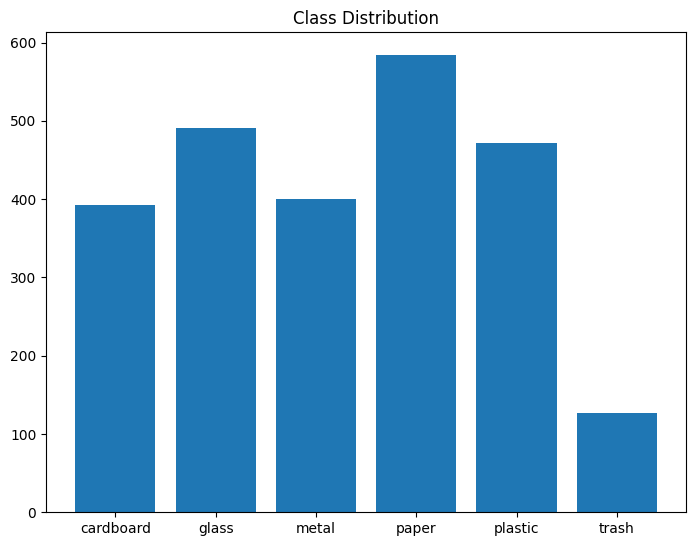

In [5]:
# display class distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

1. ``PATH_TRAIN = r"Garbage"`` - The train data used will come from garbage file images.
2. ``PATH_TEST = r"ProcessedImage"`` - The test data used will come from processed images.
3. ``class_names = ['cardboard', 'glass', 'metal']`` - Will set all the classes in the class_names so that every time it is called it will return specific classes in the dataset

4. ``imagepath_cardboard = r"Garbage\cardboard"`` - The cardboard class is assigned to imagepath_cardboard.
5. ``graypath_cardboard = r"ProcessedImage\cardboard"`` - The processed image of cardboard class is assigned to graypath_cardboard.

6. ``File_listing = os.listdir(imagepath_cardboard)`` <br>
  ``for file in File_listing:`` - The os module provides a function which lists all the files in the specified path using the names provided by the fuction. In this case the specified is ***imagepath_cardboard***. With the use ``im.resize and img.convert`` functio, the cardboard images is resize by 32 x 32 pixels and in grayscale.




**Step 4** : Split and store the data into train and test data.

In [6]:
PATH_TRAIN = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images"
PATH_TEST = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

imagepath_cardboard = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/cardboard"
graypath_cardboard = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '/' + file, "JPEG")

In [7]:
imagepath_glass = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/glass"
graypath_glass = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '/' + file, "JPEG")

In [8]:
imagepath_metal = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/metal"
graypath_metal = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '/' + file, "JPEG")

In [9]:
imagepath_paper = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/paper"
graypath_paper = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '/' + file, "JPEG")


In [10]:
imagepath_plastic = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/plastic"
graypath_plastic = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '/' + file, "JPEG")

In [11]:
imagepath_trash = r"/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/trash"
graypath_trash = r"/content/drive/MyDrive/garbage-classification-main/Garbage/processed_images/trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '/' + file)
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '/' + file, "JPEG")

1. ``train_dir = os.path.join(PATH_TRAIN)`` <br>
``test_dir = os.path.join(PATH_TEST)`` <br>
- The dataset is divided into two groups: the train data and the test data. The train data is where we teach the machine learning algorithm to predict specific images, while the test data is where we validate the algorithm's progress.

In [12]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

1. ``os.path.join`` - is a Python submodule of OS used for common pathname manipulation and provides a portable way o levergae operating system dependent functionality. In this case, we will use it in every class that our dataset has. for example, the ***imagepath_cardboard*** will intelligently join the path components which is the ***imagepath_cardboard_dir***.

In [13]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

1. ``len(os.listdir(PATH_TRAIN))`` - it allows to display the list of file in the  ***PATH_TRAIN***. It returns the total count of the list in the specified path.

In [14]:
len(os.listdir(PATH_TRAIN))

6

1. ``IMG_HEIGHT = 32`` <br>
``IMG_WIDTH = 32`` <br>
``batch_size = 32 `` -<br>
- It allows to set the image height, width, and the batch_size to 32.



In [15]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
bath_size = 32

1. ``image_gen = ImageDataGenerator(rescale=1./255)`` - Using the Keras ImageDataGeneratorclass, it can easily transform the image to range from range ***0,255*** to ***0,1***

In [16]:
image_gen = ImageDataGenerator(rescale=1./255)

1. the train folder contain a single folder inside which all the train images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [17]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


1. Same as above, the test folder contain a single folder inside which all the test images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [18]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir,
    shuffle=True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [19]:
sample_training_images, _= next(train_data_gen)

1.  The ``plotImages`` function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure(). This ``(figsize=(20,20))`` function allows to set the size of the figure, In this case the figure is set by ***20:20*** ratio. Also, The ``ax.imshow`` display the image in 2D regualr raster. The ``axes.flatten()`` it returns the flattened version of the array. The ``plt.show()`` is the pyplot allows all sets figures to be displayed.

**Step 5** : Display and examine the images from the dataset.

In [20]:
#plt.figure()
#plt.imshow(sample_training_images[0])
#plt.show()

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


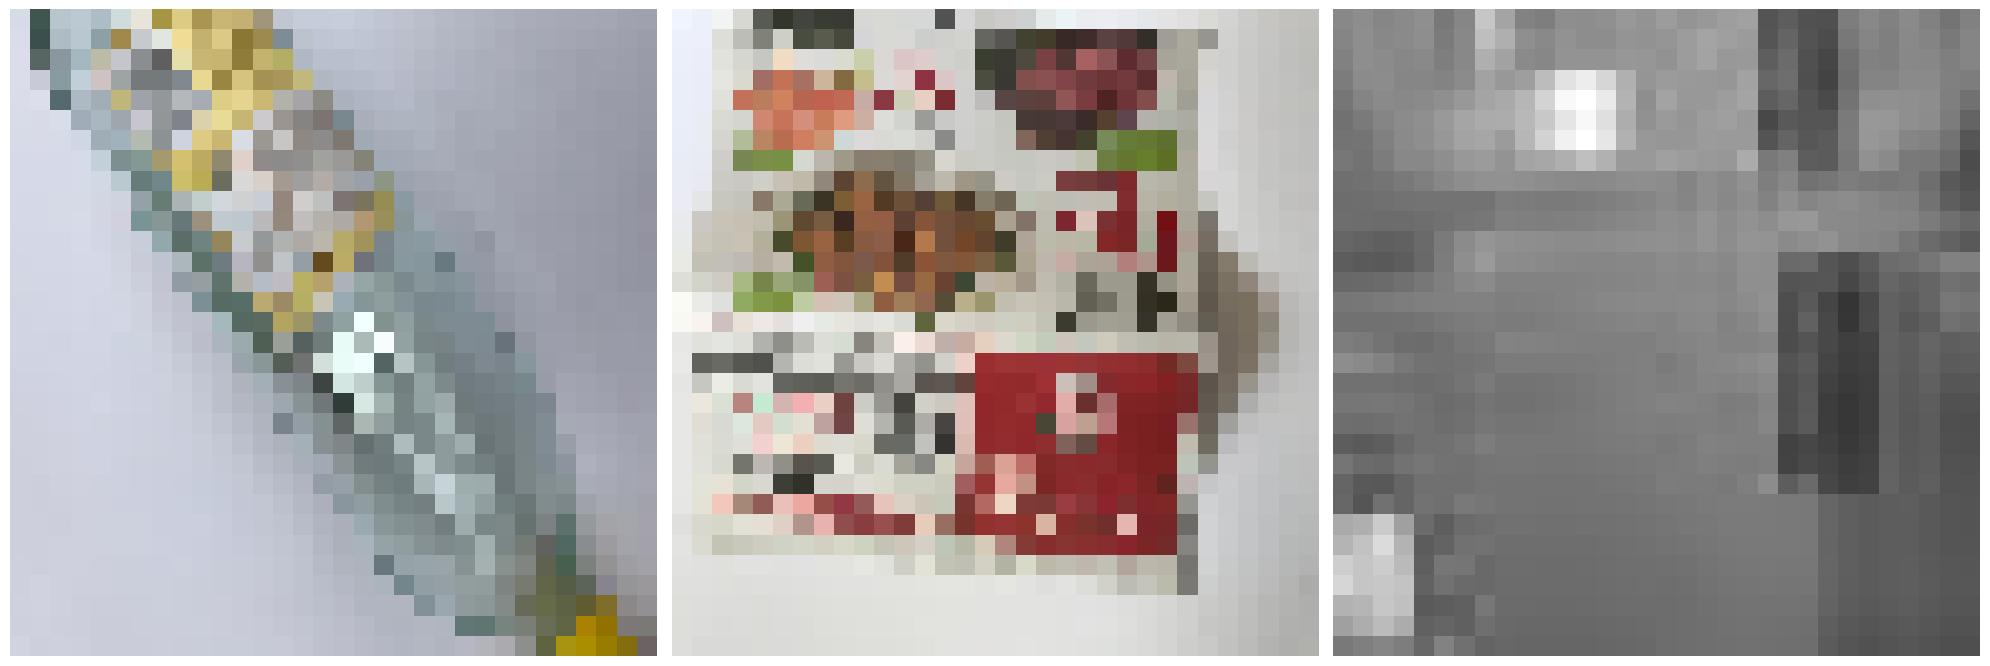

In [21]:
plotImages(sample_training_images[:6])

**Step 6** : Builing theee the Neural Network by using the Sequentil API

1. ``model = Sequential()`` -  It is a model to use when there is only one input and one output on the data you need to show. It is not appropriate to use this model if you have multiple inputs and outputs. It helps you train and infer conclusions from your model. the ``input_shape=(28,28)`` represent the resolution of the image: ***32 x 32*** pixels. ``Dense`` It creates a new dense layer and returns the necessary output data for your model to use. Activation is the element-wise activation function used to pass through the activation arguments,  relu is the rectified linear unit activation function, and Sigmoid is equivalent to a 2-element Softmax, where the second element is taken to be zero.

In [23]:
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

1. A model needs to be configured before it can be trained. Optimizers are classes or methods used to reduce the losses in the learning model by altering weight and learning rates. ***Adam*** optimizer involves a combination of two gradient descent methodologies: A model ***loss*** is the total quantity that should be minimized during training, while the ***metrics*** measures the model's performance. The ``model.summary()`` is a functions that shows the contents of the Sequential model.

**Step 7** : Defining an optimmizer, a loss function, and other useful training parameters.

In [24]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

**Step 8** : Training the model by using the train dataset.

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,150 (1.20 MB)

 Trainable params: 314,150 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
batch_size = 32
epochs = 25

1. The os module provides a function which lists all the files in the specified path using the names provided by the fuction. for example, ***imagepath_cardboard_dir*** with the num_cardboard_train.

2. ``total_train = num_cardboard_train + num_glass_train + num_metal_train`` - total number of train set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

3. ``total_test = num_cardboard_test + num_glass_test + num_metal_test`` - total number of test set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

In [27]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_paper_dir))
num_plastic_train = len(os.listdir(imagepath_plastic_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train+num_paper_train+num_plastic_train+num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test+num_paper_test+num_plastic_test+num_trash_test

1. In this model the number of epochs is set to 25 this number represent the number of times the training set to run. A model that is well-fit produces more accurate results, as it generalizes to similar data to that on which it was trained. ``validation_data`` Data on which to evaluate the loss and any model metrics at the end of each epoch. ``validation_steps`` Only relevant if validation_data is provided and is a tf. data dataset. Total number of steps to draw before stopping when performing validation at the end of every epoch.

In [30]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs = epochs,
    validation_data = test_data_gen,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=10)]
)

Epoch 1/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.5274 - loss: 1.1573 - val_accuracy: 0.1647 - val_loss: 3.9558
Epoch 2/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.6250 - loss: 1.0468 - val_accuracy: 0.1655 - val_loss: 4.1820
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.5526 - loss: 1.0534 - val_accuracy: 0.2167 - val_loss: 3.6178
Epoch 4/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.5312 - loss: 0.9931 - val_accuracy: 0.1943 - val_loss: 4.8624
Epoch 5/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - accuracy: 0.6035 - loss: 0.9934 - val_accuracy: 0.1627 - val_loss: 5.3024
Epoch 6/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5938 - loss: 0.9917 - val_accuracy: 0.1655 - val_loss: 4.9948
Epoch 7/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.6248 - loss: 0.9322 - val_accuracy: 0.3005 - val_loss: 2.2311
Epoch 8/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.5000 - loss: 1.3506 - val_accuracy

**Step 9** : Evaluating the performance of the model using the test dataset.

In [31]:
test_loss, test_acc = model.evaluate(train_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7648 - loss: 0.6353
Test accuracy: 77.16659903526306 Test Loss: 0.6270557045936584 


1. ``import plotly.graph_objects as goimport plotly.graph_objects as go `` - IT contains a automatically-generated hierarchy of Python classes that represent non-leaf nodes in this figure schema.

2. ``fig = go.Figure()`` - is a Python package for creating, manipulation, nad rendering graphocal figures. Graphs are represented by figures, which are data structure.


5. ``fig.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. It also helps to visualize more easily.

In [32]:
import plotly.graph_objects as go
fig = go.Figure()

import plotly.io as pio
pio.renderers.default = 'browser'

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                        xaxis=dict(title='Epoch'),
                        yaxis=dict(title='Percentage'))
fig.show()

Error: could not locate runnable browser

In [33]:
import plotly.graph_objects as go
fig = go.Figure()

# Instead of pio.renderers.default = 'browser', use 'colab' for Google Colab
import plotly.io as pio
pio.renderers.default = 'colab'

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                        xaxis=dict(title='Epoch'),
                        yaxis=dict(title='Percentage'))
fig.show()

In [34]:
from skimage.transform import resize

## RANDOM IMAGES

---
### IMAGE 1

---

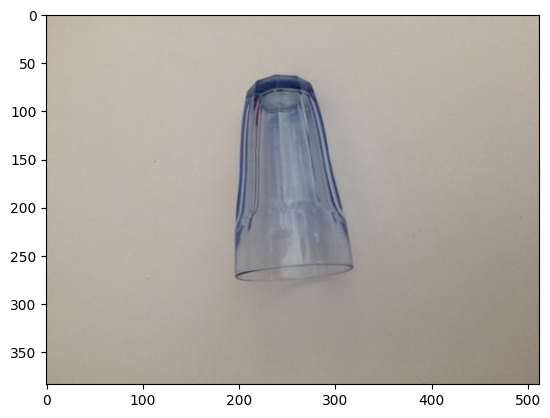

In [36]:
image = plt.imread("/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/glass/glass_006.jpg")
image_resized = resize(image, (32,32))
img = plt.imshow(image)

In [37]:
probabilities=model.predict(np.array([image_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step


In [38]:
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [39]:
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[-1]], "-- Probability", probabilities[0,index[-1]])
print("Second most likely class:", number_to_class[index[-2]], "-- Probability", probabilities[0,index[-2]])
print("Third most likely class:", number_to_class[index[-3]], "-- Probability", probabilities[0,index[-3]])


Most likely class: plastic -- Probability 0.526877
Second most likely class: glass -- Probability 0.26608247
Third most likely class: paper -- Probability 0.12683217


---
### IMAGE 2

---

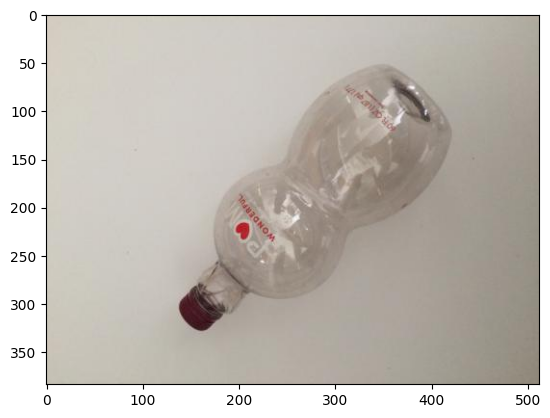

In [53]:
image = plt.imread("/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/plastic/plastic_002.jpg")
image_resized = resize(image, (32,32))
img = plt.imshow(image)

In [54]:
probabilities=model.predict(np.array([image_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [55]:
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [56]:
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[-1]], "-- Probability", probabilities[0,index[-1]])
print("Second most likely class:", number_to_class[index[-2]], "-- Probability", probabilities[0,index[-2]])
print("Third most likely class:", number_to_class[index[-3]], "-- Probability", probabilities[0,index[-3]])


Most likely class: paper -- Probability 0.51497984
Second most likely class: plastic -- Probability 0.23030202
Third most likely class: glass -- Probability 0.1796808


---
### IMAGE 3

---

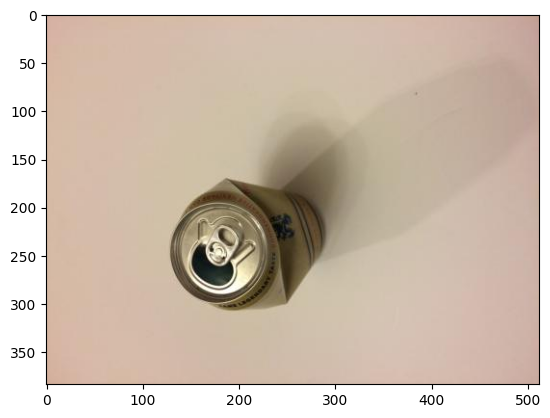

In [49]:
image = plt.imread("/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/metal/metal_003.jpg")
image_resized = resize(image, (32,32))
img = plt.imshow(image)

In [50]:
probabilities=model.predict(np.array([image_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [51]:
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [52]:
index = np.argsort(probabilities[0, :])[::-1]  # descending order
print("Most likely class:", number_to_class[index[0]], "-- Probability", probabilities[0, index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability", probabilities[0, index[1]])
print("Third most likely class:", number_to_class[index[2]], "-- Probability", probabilities[0, index[2]])


Most likely class: glass -- Probability 0.6495799
Second most likely class: plastic -- Probability 0.23354833
Third most likely class: metal -- Probability 0.049940735


---
### IMAGE 4

---

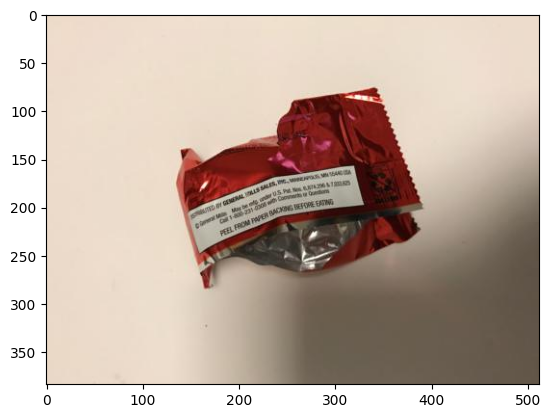

In [58]:
image = plt.imread("/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/trash/trash_003.jpg")
image_resized = resize(image, (32,32))
img = plt.imshow(image)

In [59]:
probabilities=model.predict(np.array([image_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [60]:
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [61]:
index = np.argsort(probabilities[0, :])[::-1]  # descending order
print("Most likely class:", number_to_class[index[0]], "-- Probability", probabilities[0, index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability", probabilities[0, index[1]])
print("Third most likely class:", number_to_class[index[2]], "-- Probability", probabilities[0, index[2]])


Most likely class: trash -- Probability 0.62276727
Second most likely class: glass -- Probability 0.17467906
Third most likely class: metal -- Probability 0.114738695


---
### IMAGE 5

---

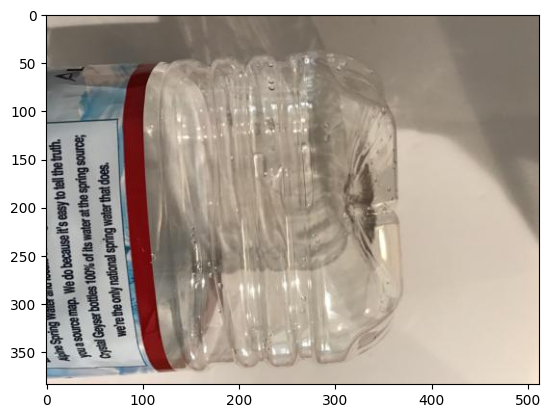

In [63]:
image = plt.imread("/content/drive/MyDrive/garbage-classification-main/Garbage/original_images/plastic/plastic_259.jpg")
image_resized = resize(image, (32,32))
img = plt.imshow(image)

In [64]:
probabilities=model.predict(np.array([image_resized]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [65]:
number_to_class = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [66]:
index = np.argsort(probabilities[0, :])[::-1]  # descending order
print("Most likely class:", number_to_class[index[0]], "-- Probability", probabilities[0, index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability", probabilities[0, index[1]])
print("Third most likely class:", number_to_class[index[2]], "-- Probability", probabilities[0, index[2]])


Most likely class: plastic -- Probability 0.4125495
Second most likely class: glass -- Probability 0.3807915
Third most likely class: metal -- Probability 0.08720917




> Member's Contribution:

*   Marquez, Jennifer C.   - *Coding, Documentation, Images Collection*
*   MArtinez, Rikki Mae M. - *Coding, Documentation, Images Collection*
*   Rario, Marianne C.     - *Coding, Documentation, Images Collection*




